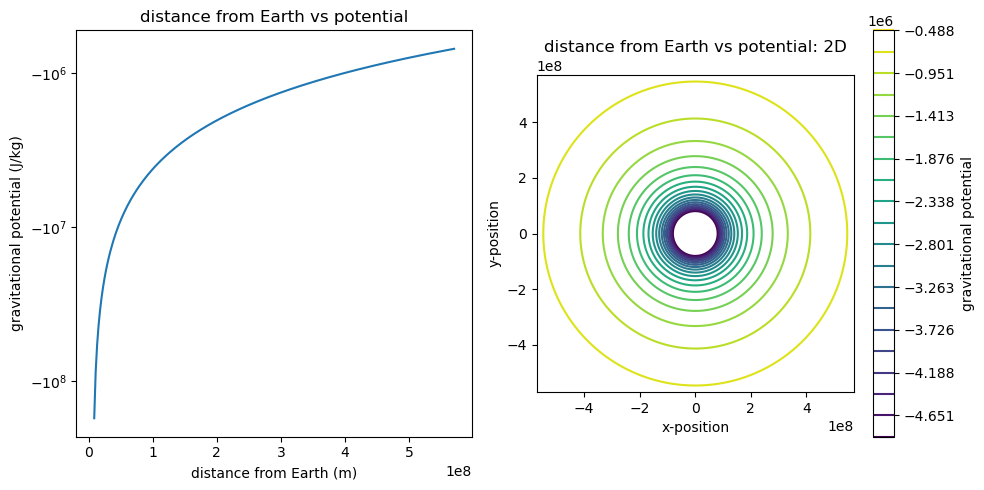

In [1]:
# Part 1
import numpy as np
import matplotlib.pyplot as plt

#defining fundemental constants
G = 6.67*10**-11 #m^3 / (kg*s^2)    Gravitational constant
M_e = 5.9*10**24 #kg.    Mass of the Earth
Moon_Dist = 3.8*10**8 #m    Distance from the Earth to the Moon
R_e = 6.378*10**6 #m    Distance from the Earth to the moon
M_m = 7.3*10**22 #kg    Mass of the Moon

#Q1: defining a function for change in gravitational potential.

def f(M, xm, ym, x, y):
    """This function evaluates gravitational potential, treating gravitational bodies as a point mass.
    It is correct for evaluating G at any distance equal to or greater than the radius of the body."""
    r_1 = np.sqrt(xm**2+ym**2)
    r_2 = np.sqrt(x**2+y**2)
    if np.isclose(r_2 - r_1, 0):
        G_poten = np.nan
    else:
        G_poten = -G * M / np.sqrt((x-xm)**2 + (y-ym)**2)
    return G_poten
    


#Q2: plotting a function of potential vs distance (all plots created together at end of section)
nx = 250

x = np.linspace(R_e, Moon_Dist*1.5, nx)
F_x = np.linspace(0,0,nx)
for i in range(len(F_x)):
    G_poten1 = f(M_e,R_e,0,x[i],0)
    F_x[i] += G_poten1

#Q3: generating a 2D contour plot of potential.
ny = 250

x2 = np.linspace(-Moon_Dist*1.5, Moon_Dist*1.5, nx)
y = np.linspace(-Moon_Dist*1.5, Moon_Dist*1.5, ny)
x_grid,y_grid = np.meshgrid(x2,y)
Φ = np.zeros((ny,nx))

for i in range(ny):
    for j in range(nx):
        Potential = f(M_e,0,0,x_grid[i,j],y_grid[i,j])
        Φ[i,j] += Potential

n = 250

#plotting both figures
import matplotlib.cm as cm
maximum = np.nanmax(Φ)
minimum = np.nanmin(Φ)
levels = np.linspace(10*maximum, maximum, 20)

fig, (ax, ax2) = plt.subplots(1,2, figsize = (10,5))
ax.plot(x,F_x)
ax.set_yscale('symlog')
ax.set_xlabel('distance from Earth (m)')
ax.set_ylabel('gravitational potential (J/kg)')
ax.set_title('distance from Earth vs potential')

contours = ax2.contour(x_grid, y_grid, Φ, levels=levels, cmap=cm.viridis)
cbar = fig.colorbar(contours)
cbar.set_label('gravitational potential')
ax2.set_aspect('equal')
ax2.set_xlim(-1.5*Moon_Dist, 1.5*Moon_Dist)
ax2.set_ylim(-1.5*Moon_Dist, 1.5*Moon_Dist)
ax2.set_title('distance from Earth vs potential: 2D')
ax2.set_xlabel('x-position')
ax2.set_ylabel('y-position')

fig.tight_layout()

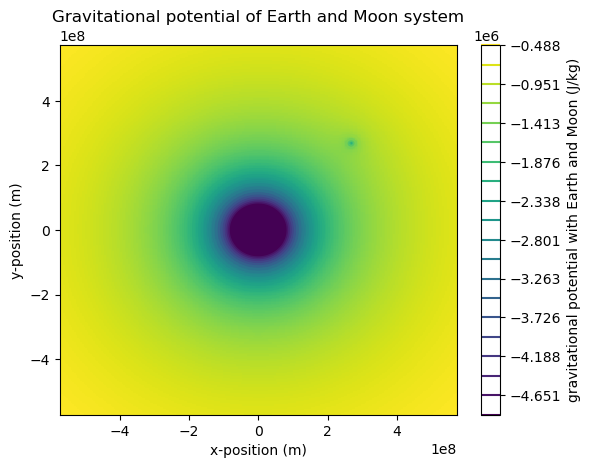

In [2]:
#Part 2

#Questions 1 and 2 of part 2

Xem = np.linspace(-Moon_Dist*1.5, Moon_Dist*1.5, nx)
Yem = np.linspace(-Moon_Dist*1.5, Moon_Dist*1.5, ny)
Xem_grid,Yem_grid = np.meshgrid(x2,y)
Φem = np.zeros((ny,nx))

for i in range(ny):
    for j in range(nx):
        Potential = f(M_e,0,0,Xem_grid[i,j],Yem_grid[i,j]) + f(M_m, Moon_Dist/np.sqrt(2), Moon_Dist/np.sqrt(2), Xem_grid[i,j], Yem_grid[i,j])
        Φem[i,j] += Potential


fig2, (ax3) = plt.subplots()

mesh = ax3.pcolormesh(Xem_grid, Yem_grid, Φem, cmap=cm.viridis, clim = (10*maximum, maximum))
ax3.set_aspect = ('equal')
contours = ax3.contour(Xem_grid, Yem_grid, Φem, levels=levels, cmap=cm.viridis)
cbar = fig2.colorbar(contours)
cbar.set_label('gravitational potential with Earth and Moon (J/kg)')
ax3.set_xlabel('x-position (m)')
ax3.set_ylabel('y-position (m)')

ax3.set_title('Gravitational potential of Earth and Moon system');

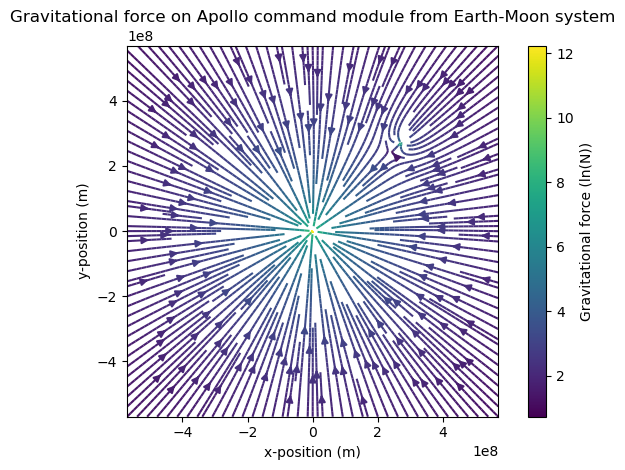

In [3]:
#Part 3
M_apollo = 5500

#Q1
def Fg(M1, m2, x1, y1, x2, y2):
    R_squared = (x2-x1)**2 + (y2-y1)**2
    if np.isclose(R_squared,0):
        Force_G_x = np.nan
        Force_G_y = np.nan
    else:
        Force_G_tot = M1*m2*G/R_squared      
        R_vector = np.array([x2-x1,y2-y1])
        R_hat = R_vector / np.linalg.norm(R_vector)
        Force_G_x = -G*M1*m2/R_squared * R_hat[0]
        Force_G_y = -G*M1*m2/R_squared * R_hat[1]
    return Force_G_x, Force_G_y

#Q2
x3 = np.linspace(-1.5*Moon_Dist, 1.5*Moon_Dist, nx)
y3 = np.linspace(-1.5*Moon_Dist, 1.5*Moon_Dist, ny)
x_grid_2, y_grid_2 = np.meshgrid(x3,y3)


Fgx = np.zeros((ny,nx))
Fgy = np.zeros((ny,nx))

for i in range(ny):
    for j in range(nx):
        F_g_Earth_x, F_g_Earth_y = Fg(M_e, M_apollo, 0, 0, x_grid_2[i,j], y_grid_2[i,j])
        F_g_Moon_x, F_g_Moon_y = Fg(M_m, M_apollo, Moon_Dist / np.sqrt(2), Moon_Dist / np.sqrt(2), x_grid_2[i,j], y_grid_2[i,j])
        Fgx[i,j] += (F_g_Earth_x + F_g_Moon_x)
        Fgy[i,j] += (F_g_Earth_y + F_g_Moon_y)

colors = np.log(np.hypot(Fgx,Fgy))

fig4, ax4 = plt.subplots()
stream = ax4.streamplot(x_grid_2, y_grid_2, Fgx, Fgy, color=colors,density=2.5)
cbar = fig4.colorbar(stream.lines)
cbar.set_label('Gravitational force (ln(N))')
ax4.set_xlim(-1.5*Moon_Dist, 1.5*Moon_Dist)
ax4.set_ylim(-1.5*Moon_Dist, 1.5*Moon_Dist)
ax4.set_title('Gravitational force on Apollo command module from Earth-Moon system')
ax4.set_aspect('equal')
ax4.set_xlabel('x-position (m)')
ax4.set_ylabel('y-position (m)')

fig4.tight_layout()


In [4]:
#Part 4
from scipy.integrate import quad

m0 = 2.8*10**6
mf = 7.5*10**5
m_dot = 1.3*10**4
g = 9.8
Ve = 2.4*10**3

#Q1
T = (m0-mf)/m_dot
print('Burn time =',round(T, 2),'seconds')

#Q2
def delta_V(t,m0,mf,m_dot,Ve,g):
    if t < T:
        Change_V = Ve * np.log(m0/(m0-m_dot*t)) - g*t
    else:
        Change_V = Ve * np.log(m0/(m0-m_dot*T)) - g*T
    return Change_V

#Q3
tot,err = quad(delta_V,0,T,args=(m0,mf,m_dot,Ve,g))
print('Distance traveled =', round(tot, 1),'meters')

Burn time = 157.69 seconds
Distance traveled = 74218.3 meters
